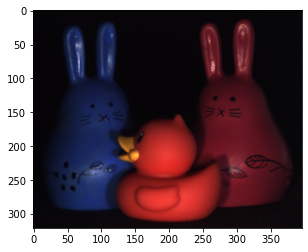

In [40]:
#import image from the computer

import numpy as np
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imageio
from findpeaks import findpeaks

from mpl_toolkits.mplot3d import Axes3D#
import pandas as pd


rgb_img = imageio.imread("C:/Users/Ana Stojanovic/OneDrive/Desktop/example_spec_removal.bmp")
plt.imshow(rgb_img)

Text(0.5, 1.0, 'diffuse_chrom_min')

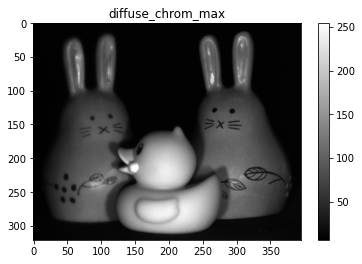

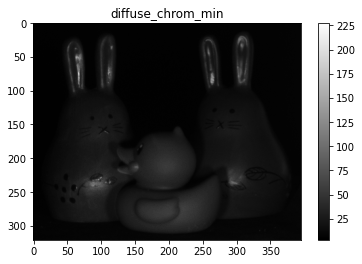

In [41]:
diffuse_chrom_max= np.zeros((len(rgb_img),len(rgb_img[0])))
diffuse_chrom_min= np.zeros((len(rgb_img),len(rgb_img[0])))
I_psf= np.zeros((len(rgb_img),len(rgb_img[0]),3))
    
# compute minimum maximum and range values for each pixel
for i in range(0, len(rgb_img)):
    for j in range(0, len(rgb_img[0])):
        red= rgb_img[i,j,0]
        green= rgb_img[i,j,1]
        blue= rgb_img[i,j,2]
        diffuse_chrom_max[i,j]= max(red, green, blue)
        diffuse_chrom_min[i,j]= min(red, green, blue)
        #pseudo spec free image
        
        I_psf[i,j,:]= rgb_img[i,j,:] - (diffuse_chrom_min[i,j],diffuse_chrom_min[i,j],diffuse_chrom_min[i,j])

plt.imshow(diffuse_chrom_max,cmap='gray')
plt.title('diffuse_chrom_max')
plt.colorbar()
plt.figure()

plt.imshow(diffuse_chrom_min,cmap='gray')
plt.colorbar()
plt.title('diffuse_chrom_min')

<Figure size 432x288 with 0 Axes>

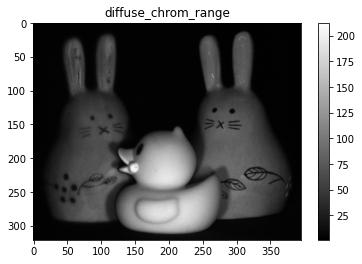

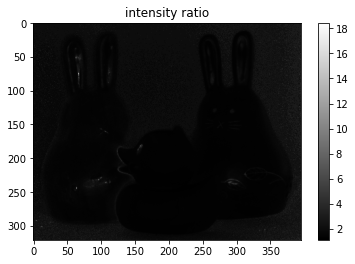

<Figure size 432x288 with 0 Axes>

In [42]:
diffuse_chrom_range = diffuse_chrom_max - diffuse_chrom_min
intensity_ratio= diffuse_chrom_max/ (diffuse_chrom_range +1)

plt.imshow(diffuse_chrom_range,cmap='gray')
plt.title('diffuse_chrom_range')
plt.colorbar()
plt.figure()

plt.imshow(intensity_ratio,cmap='gray')
plt.title('intensity ratio')
plt.colorbar()
plt.figure()

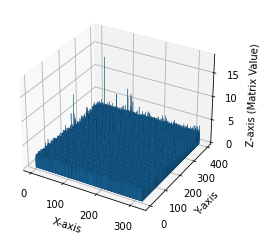

In [4]:


# Create a grid of coordinates for the 3D plot
x, y = np.meshgrid(np.arange(len(intensity_ratio)), np.arange(len(intensity_ratio[0])))
x = x.flatten()
y = y.flatten()
z = intensity_ratio.flatten()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.bar3d(x, y, np.zeros_like(z), 1, 1, z, shade=True)

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Matrix Value)')

# Show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

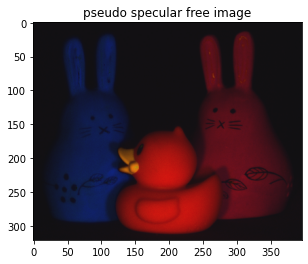

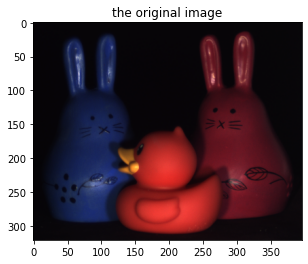

<Figure size 432x288 with 0 Axes>

In [43]:
total= 0
#calculaate average min intensity

for i in range(0, len(rgb_img)):
    for j in range(0, len(rgb_img[0])):
        total= total+ diffuse_chrom_min[i,j]
        
I_av_min= total/ ((len(rgb_img)* len(rgb_img[0])))

I_psf= I_psf + I_av_min

image= np.dstack((I_psf[:,:,0],I_psf[:,:,1],I_psf[:,:,2]))
image=  cv.convertScaleAbs(image)

plt.imshow(image)
plt.title('pseudo specular free image')
plt.figure()

plt.imshow(rgb_img)
plt.title('the original image')
plt.figure()

Text(0.5, 1.0, 'diffuse_chrom_psf_min')

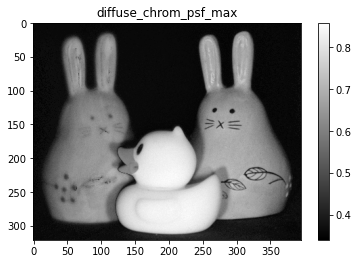

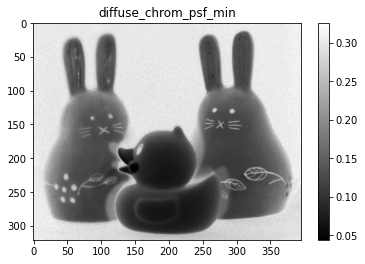

In [44]:
#diffuse chromaticity value
diffuse_chrom_psf= np.zeros((len(rgb_img),len(rgb_img[0]),3))
diffuse_chrom_psf_max= np.zeros((len(rgb_img),len(rgb_img[0])))
diffuse_chrom_psf_min= np.zeros((len(rgb_img),len(rgb_img[0])))


for i in range(0, len(rgb_img)):
    for j in range(0, len(rgb_img[0])):
        diffuse_chrom_psf[i,j,:]= I_psf[i,j,:] / (I_psf[i,j,0] +I_psf[i,j,1]+I_psf[i,j,2])
        red= diffuse_chrom_psf[i,j,0]
        green=diffuse_chrom_psf[i,j,1]
        blue=diffuse_chrom_psf[i,j,2]
        diffuse_chrom_psf_max[i,j]= max(red,green,blue)
        diffuse_chrom_psf_min[i,j]= min(red,green,blue)
        
plt.imshow(diffuse_chrom_psf_max,cmap='gray')
plt.title('diffuse_chrom_psf_max')
plt.colorbar()
plt.figure()

plt.imshow(diffuse_chrom_psf_min,cmap='gray')
plt.colorbar()
plt.title('diffuse_chrom_psf_min')

Text(0.5, 1.0, 'relevant_pixels')

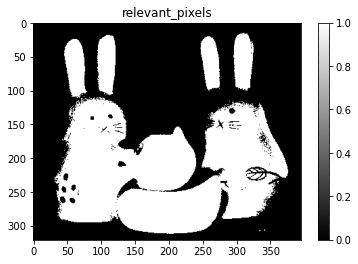

In [45]:
#choosing pixels relevant to highlight removal
#In this sense, background pixels 
#and pixels with an intensity value lower than the average minimum intensity
#lmin are discarded from further computation since they probably do not contain a specular pixel.
relevant_pixels= np.zeros((len(rgb_img),len(rgb_img[0])))

        
for i in range(0, len(rgb_img)):
    for j in range(0, len(rgb_img[0])):
        if (diffuse_chrom_min[i,j]> I_av_min) :
            relevant_pixels[i,j] = 1
            
plt.imshow(relevant_pixels,cmap='gray')
plt.colorbar()
plt.title('relevant_pixels')

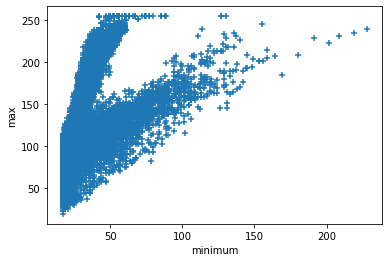

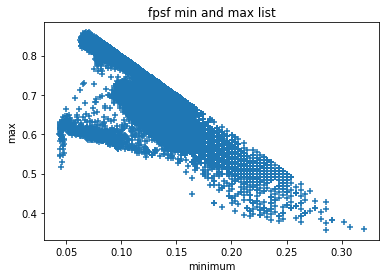

In [46]:
x=[]
y=[]
for i in range(0, len(rgb_img)):
    for j in range(0, len(rgb_img[0])):
        if relevant_pixels[i,j] == 1:
            x.append(i)
            y.append(j)
      
plt.scatter(diffuse_chrom_min[x,y],diffuse_chrom_max[x,y], marker='+')
plt.xlabel('minimum')
plt.ylabel('max')
plt.show()

diffuse_chrom_psf_min_less= diffuse_chrom_psf_min[x,y]
diffuse_chrom_psf_max_less =diffuse_chrom_psf_max[x,y]

plt.scatter(diffuse_chrom_psf_min_less, diffuse_chrom_psf_max_less, marker='+')
plt.title('fpsf min and max list')
plt.xlabel('minimum')
plt.ylabel('max')
plt.show()

In [47]:
pseudo_chrom= np.zeros((len(diffuse_chrom_psf_min_less),2))


for i in range(0, len(diffuse_chrom_psf_min_less)):
            pseudo_chrom[i,0]=diffuse_chrom_psf_min_less[i]
            pseudo_chrom[i,1]=diffuse_chrom_psf_max_less[i]
        

In [48]:
# find the 3 initial centroids
highest_minimum = float('-inf')
coord1= (0,0)
highest_maximum= float('-inf')
coord2= (0,0)
lowest_minimum= float('inf')
coord3= (0,0)

# Iterate through the matrix to find the highest y value
for mini, maxi in pseudo_chrom:
    if mini > highest_minimum:
        highest_minimum = mini
        coord1= (mini,maxi)
    if mini < lowest_minimum:
        lowest_minimum= mini
        coord2= (mini,maxi)
    if maxi > highest_maximum:
        highest_maximum = maxi
        coord3= (mini,maxi)
        
# Select random observation as centroids
Centroids = np.array([coord1, coord2,coord3] )
print(Centroids)

[[0.32009548 0.35980905]
 [0.04388115 0.60191593]
 [0.07028323 0.85943354]]


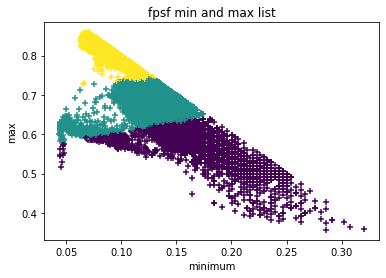

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init=Centroids, n_init=1)

# Fit the model to the data
kmeans.fit(pseudo_chrom)

# Get the final centroids and labels
final_centroids = kmeans.cluster_centers_
labels = kmeans.labels_


plt.scatter(pseudo_chrom[:,0], pseudo_chrom[:,1], marker='+',  c = kmeans.labels_)
plt.title('fpsf min and max list')
plt.xlabel('minimum')
plt.ylabel('max')
plt.show()

Text(0.5, 1.0, 'relevant_pixels')

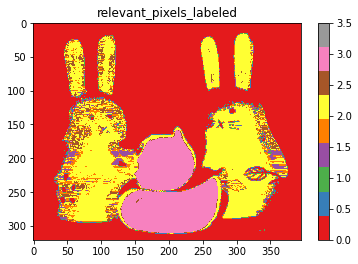

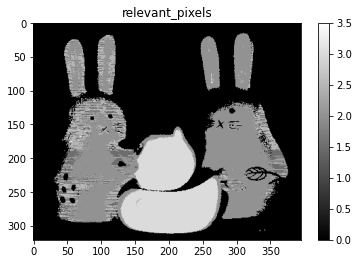

In [52]:
# visualising where these pixels are in the image 
relevant_pixels_labeled= relevant_pixels
index= 0
for i in range(0, len(rgb_img)):
    for j in range(0, len(rgb_img[0])):
        if (relevant_pixels[i,j] == 1):
            relevant_pixels_labeled[i,j] = (kmeans.labels_[index] +1)
            index= index+1
            
plt.imshow(relevant_pixels_labeled,cmap='Set1')
plt.colorbar()
plt.title('relevant_pixels_labeled')

plt.figure()
plt.imshow(relevant_pixels,cmap='gray')
plt.colorbar()
plt.title('relevant_pixels')

In [1]:
print(relevant_pixels_labeled[200,200])
# choose an intensity ratio
intensity_ratios=[1.0,2.0,3.0]
for ir in range(0, len(intensity_ratios)):
    arr= []

    for i in range(0, len(rgb_img)):
        for j in range(0, len(rgb_img[0])):
            for index in range(0,len(kmeans.labels_)):
                if (relevant_pixels_labeled[i,j]== intensity_ratios[ir]):
                    arr.append(intensity_ratio[i,j])




    sorted_arr = np.sort(arr)
    intensity_ratios[ir]=sorted_arr[len(sorted_arr) // 2]
    
print(intensity_ratios)  


NameError: name 'relevant_pixels_labeled' is not defined

K=3
diff = 1
j=0

x= np.array((len(pseudo_chrom),3))
while(diff!=0):
    XD=pseudo_chrom
    i=1
    for pixel1 in Centroids:
        ED=[]
        for mini,maxi in XD:
            d1=(pixel1[0]-mini)**2
            d2=(pixel1[1]-maxi)**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X[2]=C
    Centroids_new = X.groupby([2]).mean()[[1,0]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new[1] - Centroids[1]).sum() + (Centroids_new[0] - Centroids[0]).sum()
        print(diff.sum())
    Centroids = X.groupby([2]).mean()[[1,0]]
    
    
color=['blue','green','cyan']
for k in range(K):
    data=X[X[2]==k+1]
    plt.scatter(data[0],data[1],c=color[k])
plt.scatter(Centroids[0],Centroids[1],c='red')
plt.xlabel('minimum')
plt.ylabel('maximum')
plt.show()